In [5]:
pip install pandas numpy scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\kesha\Downloads\Dataset_ATS_v2.csv"
df = pd.read_csv(file_path)

# Display basic information
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           7043 non-null   object
 1   SeniorCitizen    7043 non-null   int64 
 2   Dependents       7043 non-null   object
 3   tenure           7043 non-null   int64 
 4   PhoneService     7043 non-null   object
 5   MultipleLines    7043 non-null   object
 6   InternetService  7043 non-null   object
 7   Contract         7043 non-null   object
 8   MonthlyCharges   7043 non-null   int64 
 9   Churn            7043 non-null   object
dtypes: int64(3), object(7)
memory usage: 550.4+ KB
None
   gender  SeniorCitizen Dependents  tenure PhoneService MultipleLines  \
0  Female              0         No       1           No            No   
1    Male              0         No      41          Yes            No   
2  Female              0        Yes      52          Yes            No   


In [9]:
# Save the Preprocessed Dataset
df.to_csv("customer_churn_analysis/Data_Preparation/Preprocessed_Dataset.csv", index=False)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Encoding binary categorical variables
binary_cols = ['gender', 'Dependents', 'PhoneService', 'Churn']
label_encoders = {col: LabelEncoder() for col in binary_cols}

for col, encoder in label_encoders.items():
    df[col] = encoder.fit_transform(df[col])

# One-hot encoding for multi-category categorical variables
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'Contract'], drop_first=True)

# Separating features and target variable
X = df.drop(columns=['Churn'])
y = df['Churn']

# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling numerical features
scaler = MinMaxScaler()
X_train[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges']])
X_test[['tenure', 'MonthlyCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges']])

print(X_train.head())


      gender  SeniorCitizen  Dependents    tenure  PhoneService  \
3757       1              0           1  0.013889             1   
3165       0              0           0  0.416667             1   
4912       0              1           0  0.638889             1   
3877       1              0           0  0.597222             1   
3818       1              0           0  0.013889             1   

      MonthlyCharges  MultipleLines_Yes  InternetService_Fiber optic  \
3757        0.415842              False                        False   
3165        0.366337              False                        False   
4912        0.811881               True                         True   
3877        0.475248              False                        False   
3818        0.019802               True                         True   

      Contract_One year  Contract_Two year  
3757              False               True  
3165               True              False  
4912              False      

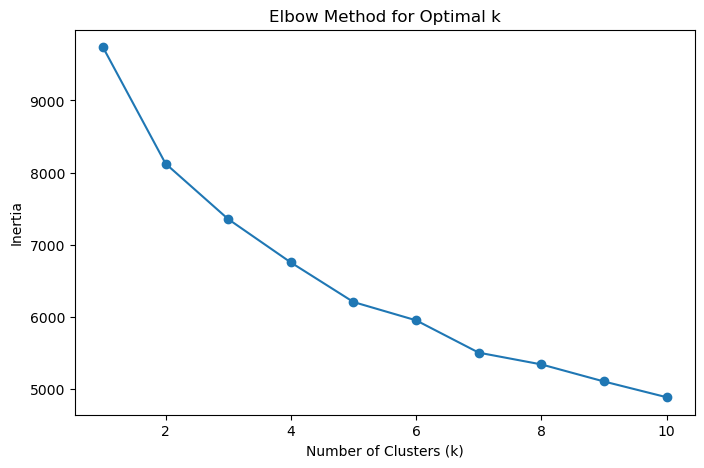

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Finding the optimal number of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


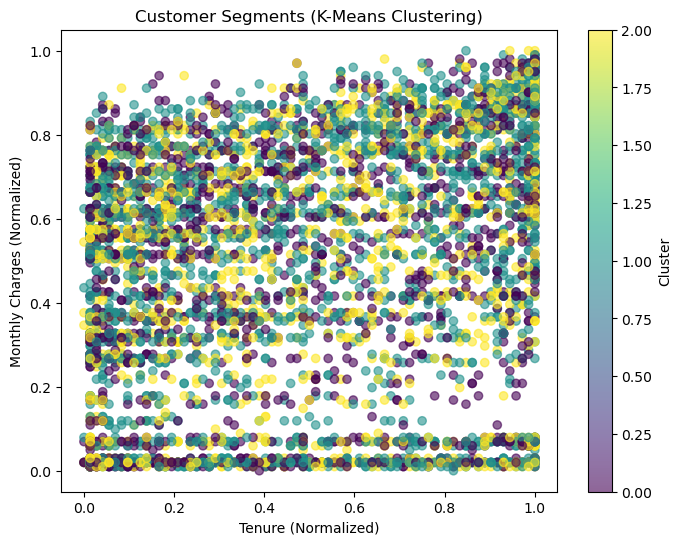

In [15]:
# Choose optimal k from the Elbow method (k=3)
optimal_k = 3

# Training the K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
X_train['Cluster'] = kmeans.fit_predict(X_train)

# Visualizing the clusters using the first two features (tenure and MonthlyCharges)
plt.figure(figsize=(8, 6))
plt.scatter(X_train['tenure'], X_train['MonthlyCharges'], c=X_train['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Tenure (Normalized)')
plt.ylabel('Monthly Charges (Normalized)')
plt.title('Customer Segments (K-Means Clustering)')
plt.colorbar(label='Cluster')
plt.show()


In [17]:
# Save preprocessed datasets
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("Preprocessed datasets saved successfully!")


Preprocessed datasets saved successfully!


In [19]:
import joblib

# Save K-Means Model
joblib.dump(kmeans, "kmeans_model.pkl")

print("K-Means model saved successfully!")


K-Means model saved successfully!


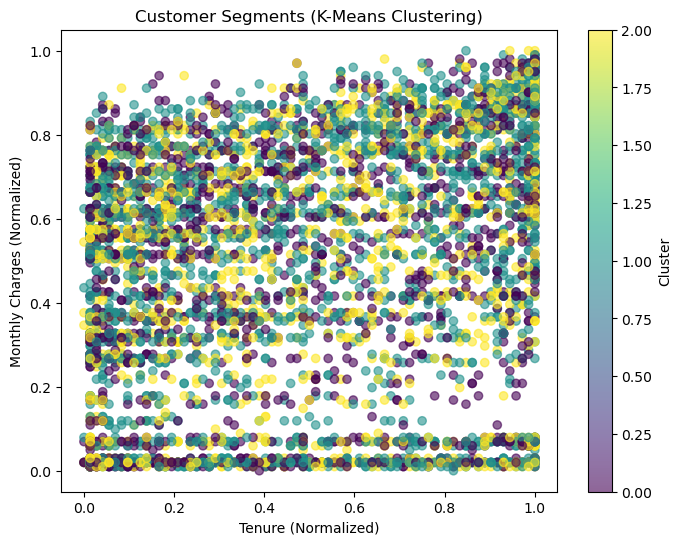

Clustering visualization saved successfully!


In [21]:
# Save the clustering visualization as an image
plt.figure(figsize=(8, 6))
plt.scatter(X_train['tenure'], X_train['MonthlyCharges'], c=X_train['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Tenure (Normalized)')
plt.ylabel('Monthly Charges (Normalized)')
plt.title('Customer Segments (K-Means Clustering)')
plt.colorbar(label='Cluster')

# Save plot as PNG
plt.savefig("clustering_visualization.png")
plt.show()

print("Clustering visualization saved successfully!")


In [23]:
!pip install tensorflow


In [17]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [19]:
# Step 1: Define the ANN architecture using Input()
model = Sequential()

In [21]:
# Input layer
model.add(Input(shape=(X_train.shape[1],)))

In [23]:
# First Hidden Layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))

In [25]:
# Second Hidden Layer
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

In [27]:
# Output Layer
model.add(Dense(units=1, activation='sigmoid'))

In [29]:
# Step 2: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
# Step 3: Train the model
print(X_train.dtypes)

gender                           int32
SeniorCitizen                    int64
Dependents                       int32
tenure                         float64
PhoneService                     int32
MonthlyCharges                 float64
MultipleLines_Yes                 bool
InternetService_Fiber optic       bool
Contract_One year                 bool
Contract_Two year                 bool
Cluster                          int32
dtype: object


In [69]:
print(y_train.dtypes)

int32


In [31]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')

In [33]:
X_test = X_test.apply(pd.to_numeric, errors='coerce')

In [35]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


In [37]:
y_train = pd.to_numeric(y_train, errors='coerce').fillna(0).astype(int)


In [39]:
# Step 3: Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6763 - loss: 0.6019 - val_accuracy: 0.7595 - val_loss: 0.4942
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7433 - loss: 0.5027 - val_accuracy: 0.7870 - val_loss: 0.4579
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7786 - loss: 0.4752 - val_accuracy: 0.7995 - val_loss: 0.4410
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7826 - loss: 0.4600 - val_accuracy: 0.8119 - val_loss: 0.4372
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7928 - loss: 0.4524 - val_accuracy: 0.7933 - val_loss: 0.4396
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7823 - loss: 0.4702 - val_accuracy: 0.8101 - val_loss: 0.4348
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7783 - loss: 0.4701 - val_accuracy: 0.8012 - val_loss: 0.4350
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7831 - loss: 0.4588 - val_accuracy: 0.

In [41]:
model.save('trained_model.keras')

In [19]:
print(X_train.shape)
print(X_test.shape)


(5634, 10)
(1409, 10)


In [41]:
# Step 4: Predict and Evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [43]:
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [35]:
y_test_numeric = y_test.map({'No': 0, 'Yes': 1})


In [27]:
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [51]:
print(confusion_matrix(y_test, y_pred))

[[168 867]
 [ 27 347]]


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [87]:
from sklearn.linear_model import LogisticRegression

In [91]:
X_train.dtypes


gender             object
SeniorCitizen       int64
Dependents         object
tenure              int64
PhoneService       object
MultipleLines      object
InternetService    object
Contract           object
MonthlyCharges      int64
dtype: object

In [93]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

In [95]:
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [97]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_encoded, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [99]:
y_pred = model.predict(X_test_encoded)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

          No       0.88      0.71      0.79      1035
         Yes       0.48      0.74      0.58       374

    accuracy                           0.72      1409
   macro avg       0.68      0.72      0.68      1409
weighted avg       0.78      0.72      0.73      1409



In [15]:
from keras.saving import save_model
save_model(model, 'trained_model.keras')


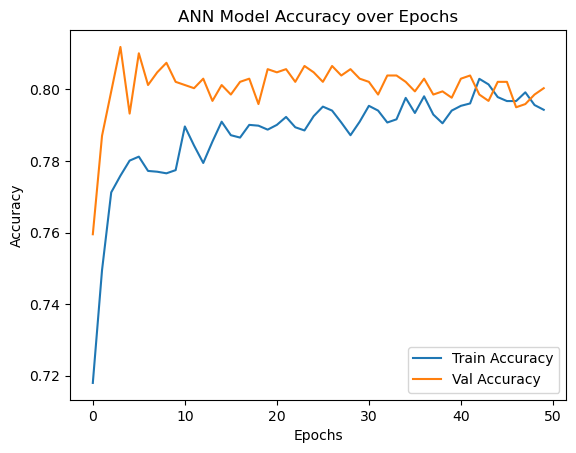

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ANN Model Accuracy over Epochs')
plt.show()


In [47]:
plt.savefig("ANN Model Accuracy over Epoches.png")
plt.show()

<Figure size 640x480 with 0 Axes>